In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep = ';')

In [3]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [4]:
len(df['quality'].unique())

6

In [5]:
df['quality'].nunique()

6

In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [8]:
df.duplicated().sum()


240

In [9]:
df=df.drop_duplicates()

In [10]:
X=df.drop("quality",axis=1)

In [11]:
y=df['quality']

In [12]:
  from sklearn.model_selection import train_test_split,GridSearchCV

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [14]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5219298245614035, 0.9166666666666666, 'x[10] <= 10.15\ngini = 0.645\nsamples = 910\nvalue = [7, 31, 389, 359, 114, 10]'),
 Text(0.27631578947368424, 0.75, 'x[6] <= 62.5\ngini = 0.495\nsamples = 459\nvalue = [3, 15, 298, 131, 12, 0]'),
 Text(0.14035087719298245, 0.5833333333333334, 'x[1] <= 0.548\ngini = 0.571\nsamples = 282\nvalue = [3, 11, 151, 105, 12, 0]'),
 Text(0.07017543859649122, 0.4166666666666667, 'x[9] <= 0.585\ngini = 0.596\nsamples = 136\nvalue = [1, 4, 52, 68, 11, 0]'),
 Text(0.03508771929824561, 0.25, 'x[7] <= 0.996\ngini = 0.512\nsamples = 44\nvalue = [0, 4, 28, 12, 0, 0]'),
 Text(0.017543859649122806, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.05263157894736842, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.10526315789473684, 0.25, 'x[7] <= 0.996\ngini = 0.547\nsamples = 92\nvalue = [1, 0, 24, 56, 11, 0]'),
 Text(0.08771929824561403, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.12280701754385964, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.210526315789

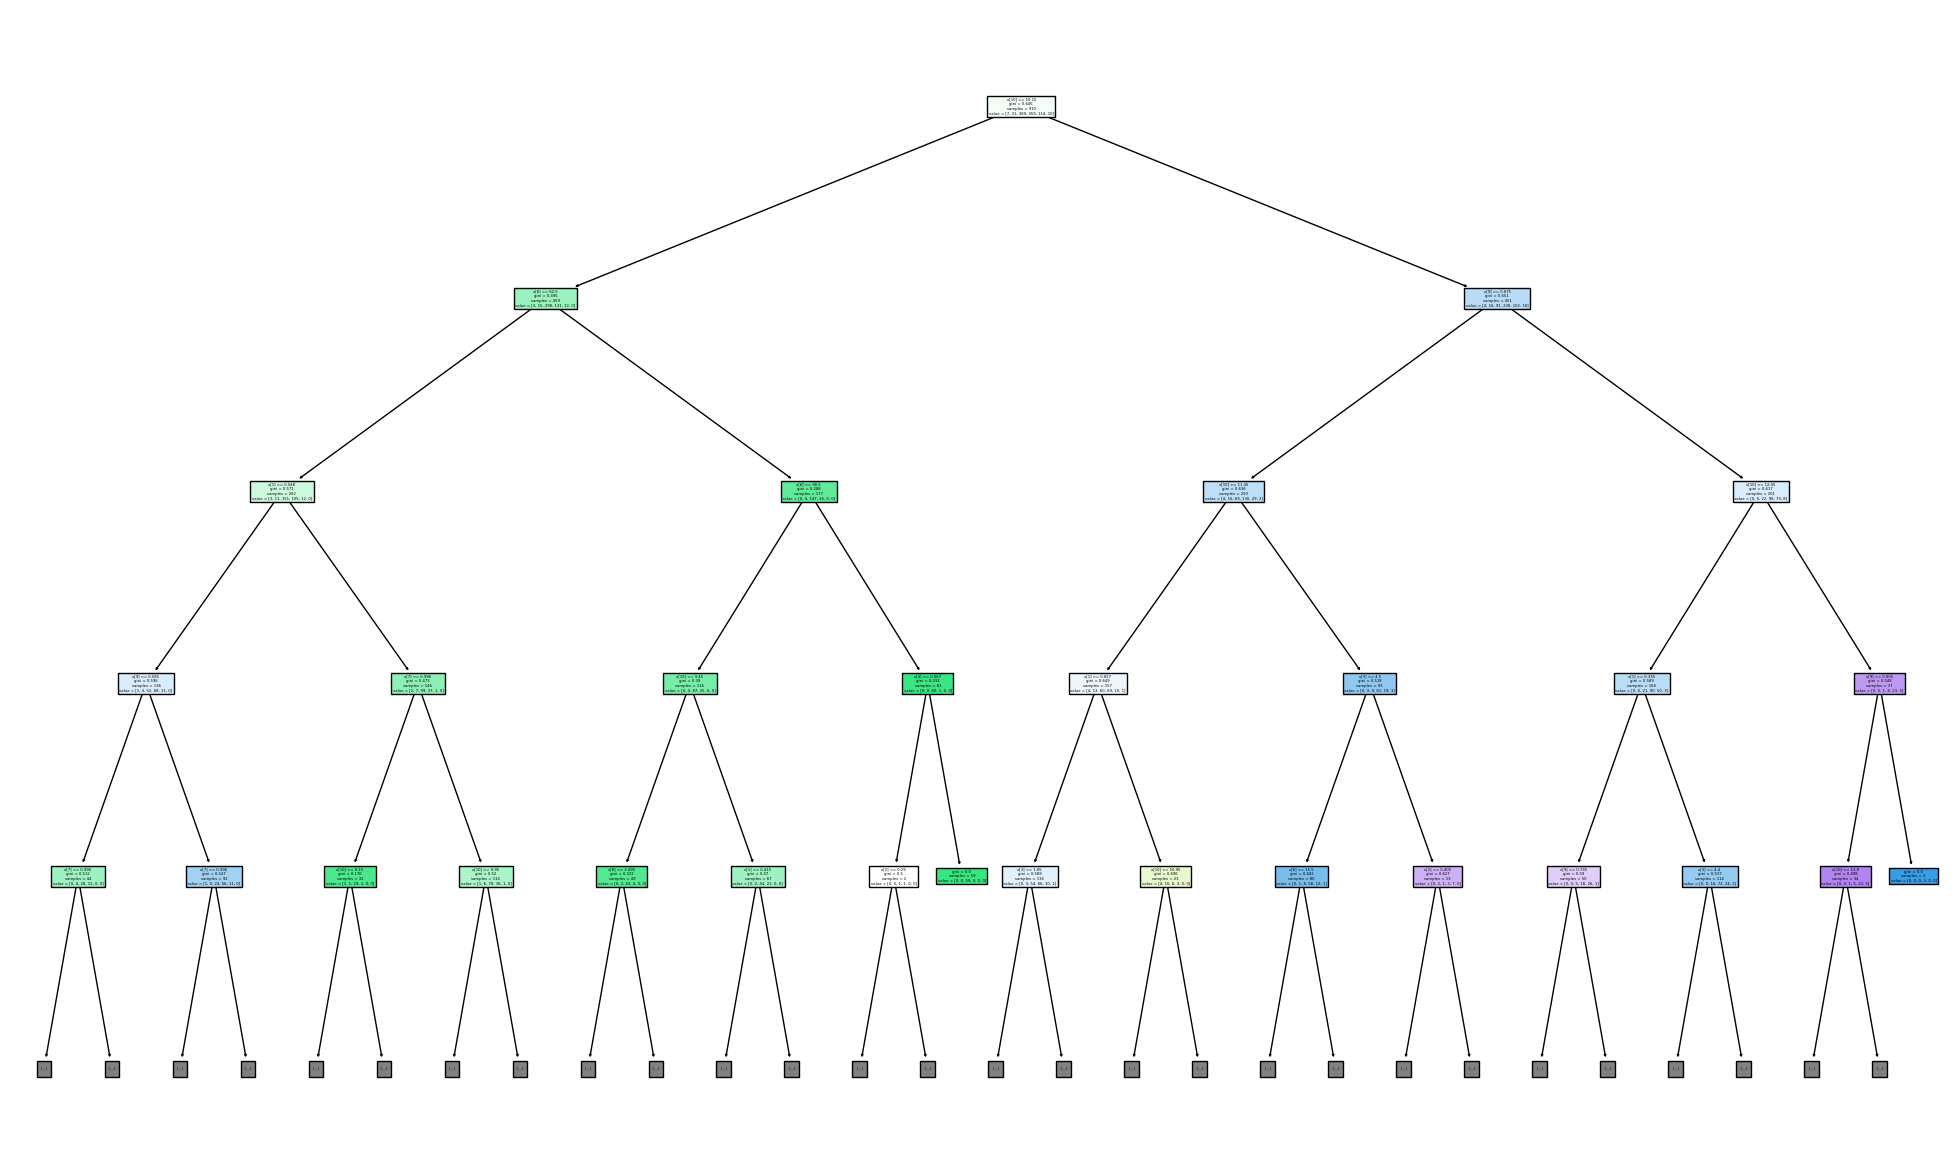

In [15]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model, max_depth=4,filled=True)

In [16]:
fig.savefig("decistion_tree_classifier.png")

In [17]:
y_predict=model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_test,y_predict)

0.4766146993318486

In [20]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']
    
}

In [21]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=model,param_grid=grid_param,cv=3,verbose=1)

In [22]:
grid_searh.fit(X_train,y_train)

Fitting 3 folds for each of 1344 candidates, totalling 4032 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']},
             verbose=1)

In [23]:
grid_searh.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'splitter': 'random'}

In [24]:
model_with_best_params=DecisionTreeClassifier(criterion= 'entropy',max_depth= 5,min_samples_leaf= 3,min_samples_split= 5,splitter='random')

In [25]:
model_with_best_params.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=5, splitter='random')

[Text(0.48214285714285715, 0.9166666666666666, 'x[10] <= 11.066\nentropy = 1.721\nsamples = 910\nvalue = [7, 31, 389, 359, 114, 10]'),
 Text(0.22767857142857142, 0.75, 'x[9] <= 0.498\nentropy = 1.519\nsamples = 669\nvalue = [7, 23, 360, 234, 44, 1]'),
 Text(0.09821428571428571, 0.5833333333333334, 'x[8] <= 3.266\nentropy = 1.211\nsamples = 67\nvalue = [2, 7, 49, 9, 0, 0]'),
 Text(0.05357142857142857, 0.4166666666666667, 'x[0] <= 11.294\nentropy = 0.722\nsamples = 25\nvalue = [0, 0, 20, 5, 0, 0]'),
 Text(0.03571428571428571, 0.25, 'x[2] <= 0.317\nentropy = 0.773\nsamples = 22\nvalue = [0, 0, 17, 5, 0, 0]'),
 Text(0.017857142857142856, 0.08333333333333333, 'entropy = 0.629\nsamples = 19\nvalue = [0, 0, 16, 3, 0, 0]'),
 Text(0.05357142857142857, 0.08333333333333333, 'entropy = 0.918\nsamples = 3\nvalue = [0, 0, 1, 2, 0, 0]'),
 Text(0.07142857142857142, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0, 0]'),
 Text(0.14285714285714285, 0.4166666666666667, 'x[10] <= 10.43\nentropy =

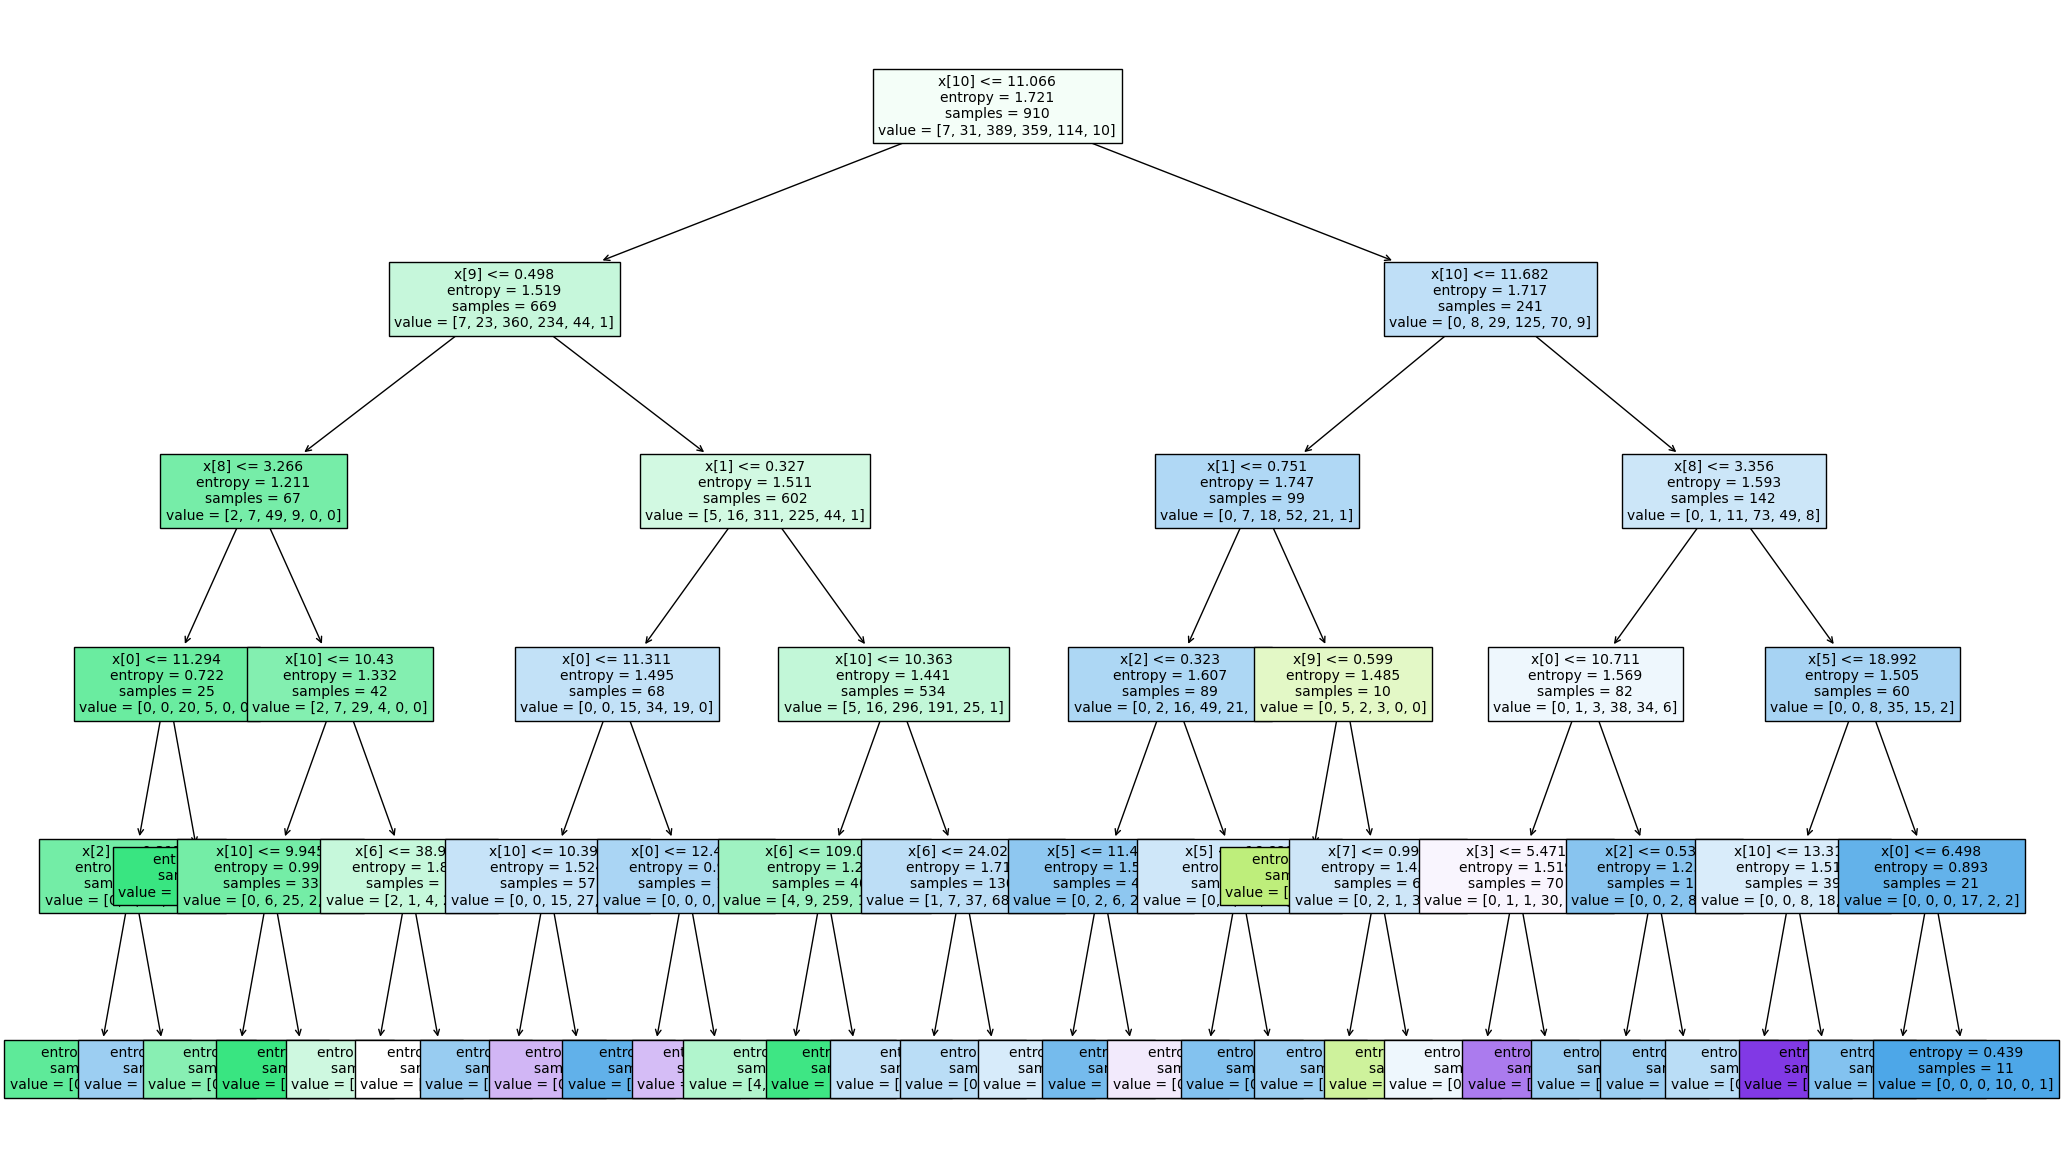

In [26]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params,filled=True,fontsize=10)

In [27]:
y_prediction2=model_with_best_params.predict(X_test)

In [28]:
accuracy_score(y_test,y_prediction2)

0.5233853006681515